In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font color="red" size="5">ch012 데이터 시각화</font>
- 시각화 라이브러리: matplotlib, seaborn(데이터시각화), folium(지도시각화)
   * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
   * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby기능 포함된 라이브러리
# 1절. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
#한글설정
plt.rc('font', family='Malgun Gothic') #윈도우즈
#plt.rcParams['font.family']='Malgun Gothic'
plt.rc('axes',unicode_minus=False)#축의 -깨짐 방지
#warnint(경고) 안보이게


## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
      1. 데이터 준비
      2. 그래프 생성
      3. 그래프 함수로 그리기
      4. 그래프 커스터마이징
      5. 그래프 출력 및 저장

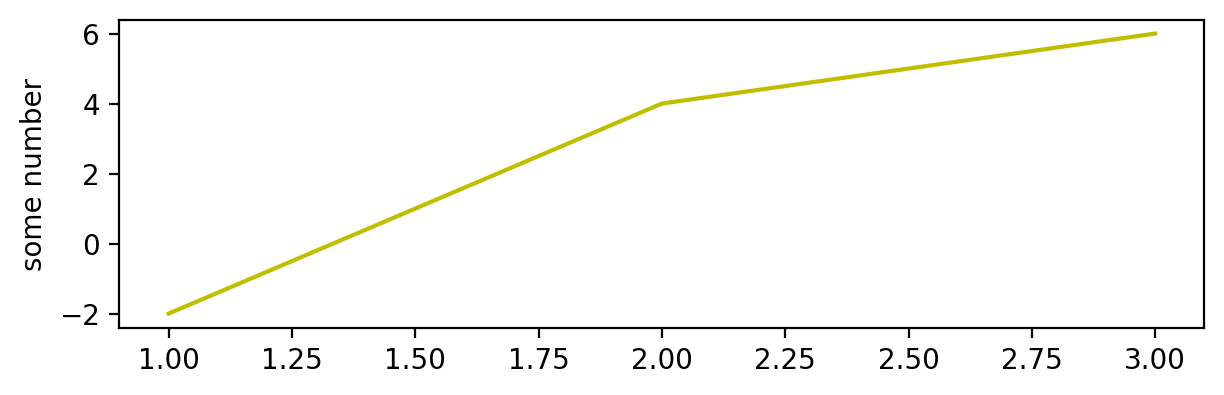

In [15]:
x = [1, 2, 3] #1)데이터 준비
y = [-2, 4, 6]
plt.figure(figsize=(7,2)) #2)그래프 객체 생성
plt.plot(x,y, color='y')#3)그래프 함수
plt.ylabel('some number')#4)커스터마이징
plt.show()#5)그래프 화면 출력 cf)plt.savefig('파일명.jpg')

## 1.3 그래프 영역 나누기
### 1)subplot()함수로 서브플롯 추가

In [17]:
import numpy as np
x = np.arange(0,10,0.01)
len(x)

1000

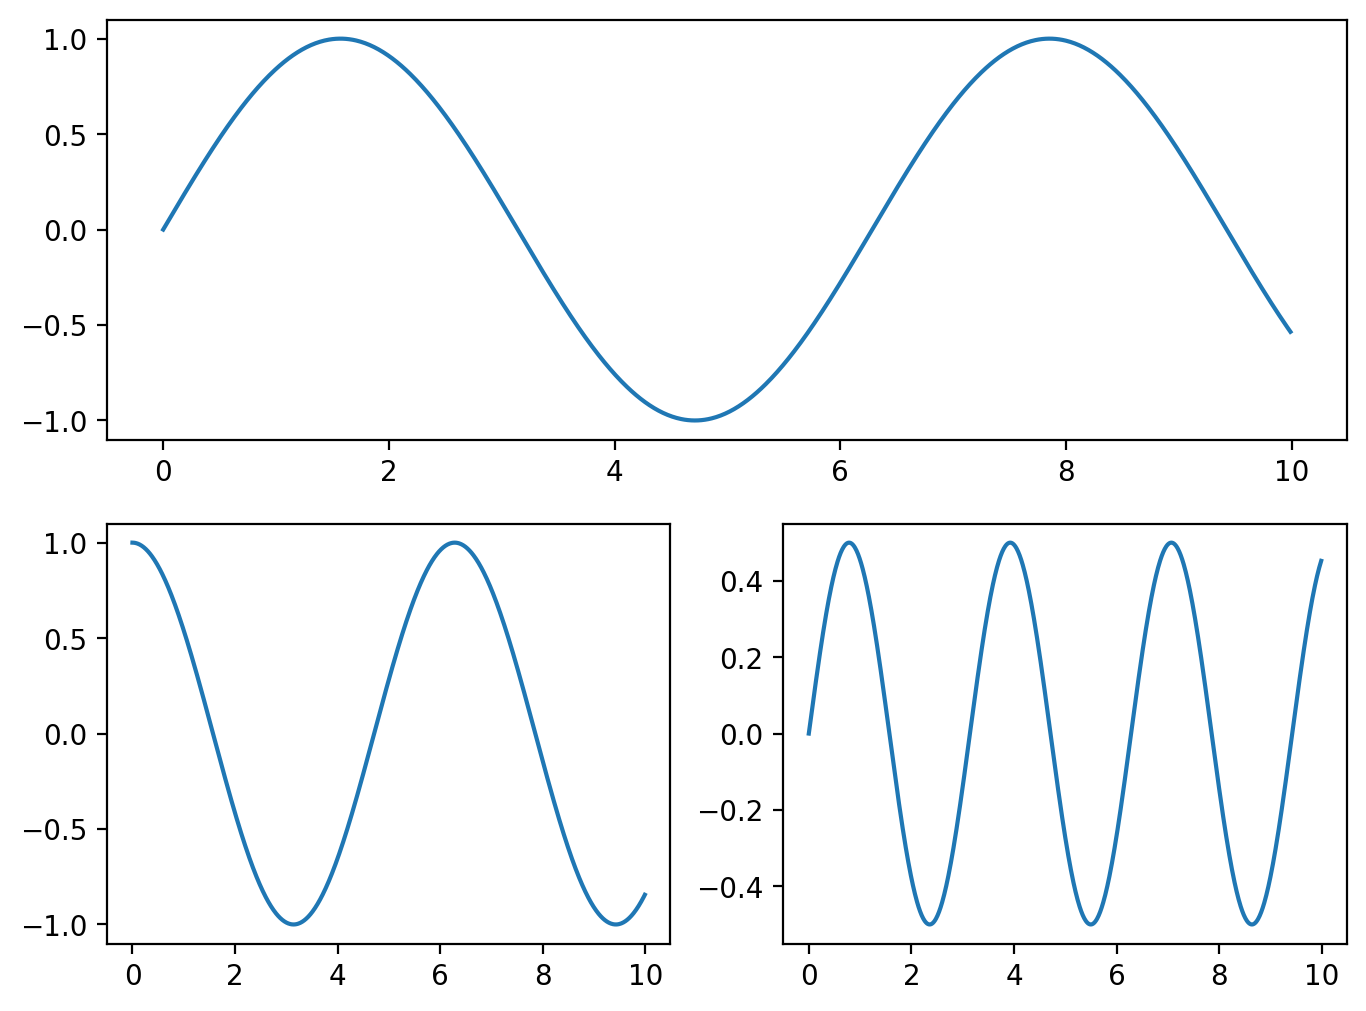

In [24]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1);plt.plot(x,np.sin(x))
plt.subplot(2,2,3);plt.plot(x,np.cos(x))
plt.subplot(2,2,4);plt.plot(x,np.sin(x)*np.cos(x))

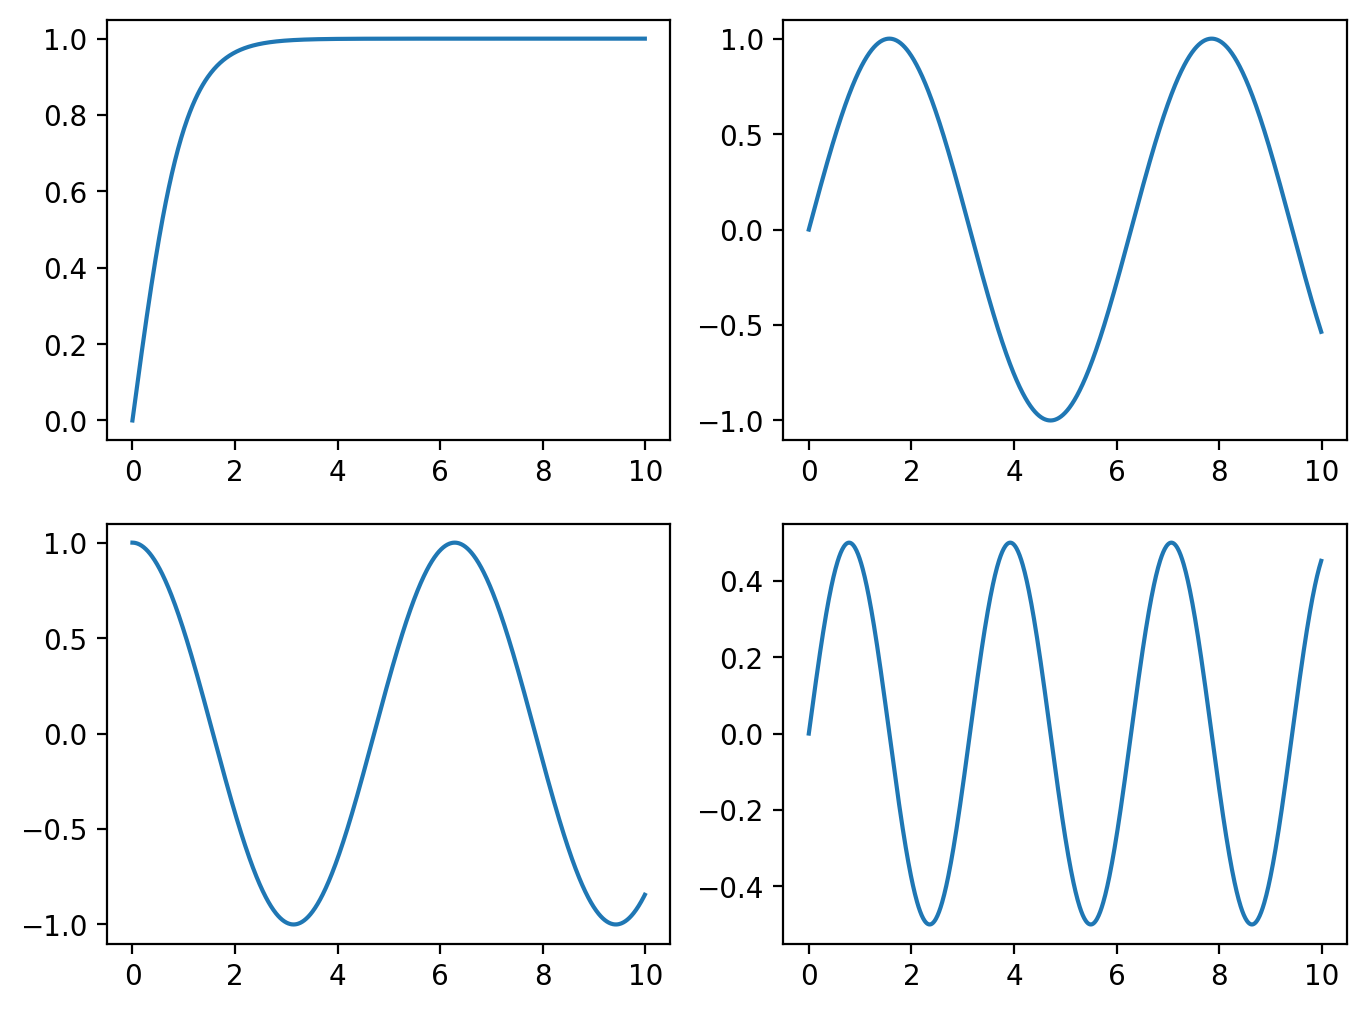

In [25]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1);plt.plot(x,np.tanh(x))
plt.subplot(2,2,2);plt.plot(x,np.sin(x))
plt.subplot(2,2,3);plt.plot(x,np.cos(x))
plt.subplot(2,2,4);plt.plot(x,np.sin(x)*np.cos(x))

### 2) subplots()함수로 서브플롯 추가
- 교안(14page) : https://wikidocs.net/92085

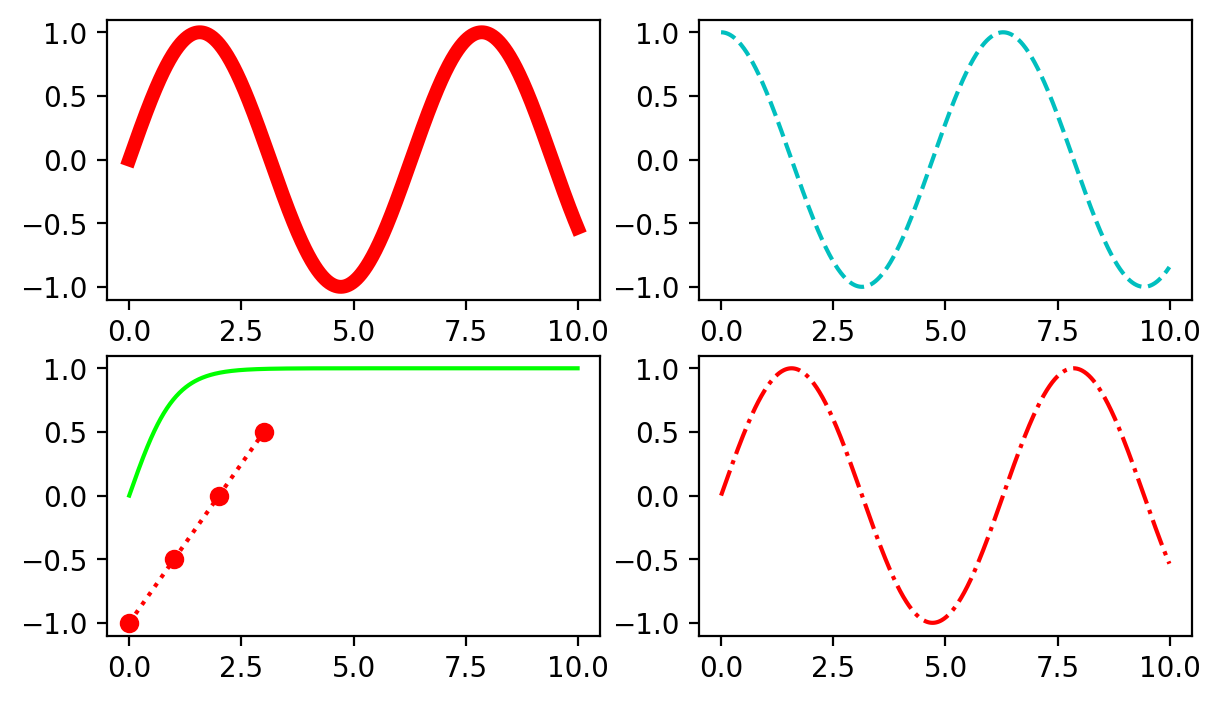

In [43]:
#2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (7,4))
axes[0,0].plot(x,np.sin(x), 'r', linewidth=5)
axes[0,1].plot(x,np.cos(x), 'c--') #color='c', linestyle=':','--','-'
axes[1,0].plot([0,1,2,3], [-1,-0.5,0,0.5], 'ro:') #color='r', marker='o', '^', 's'
axes[1,0].plot(x,np.tanh(x), '#00FF00')
axes[1,1].plot(x,np.sin(x), 'r-.')
plt.show()

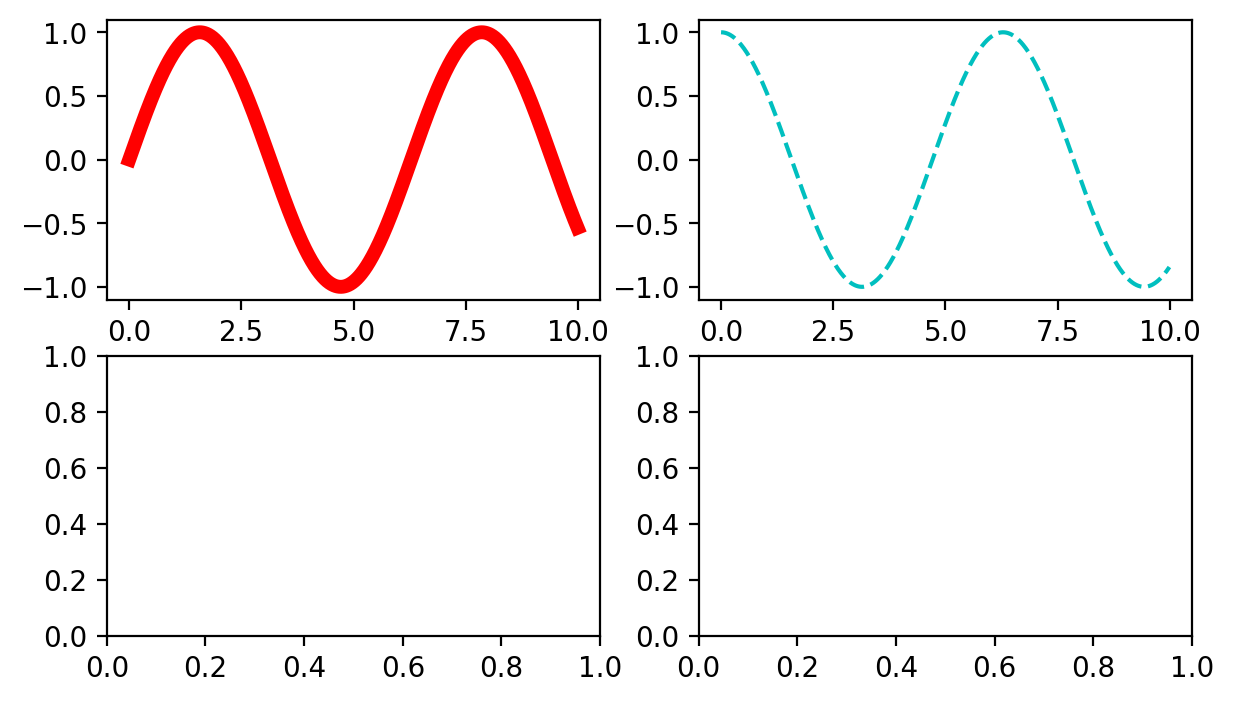

In [49]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (7,4))
axes[0,0].plot(x,np.sin(x), 'r', linewidth=5)
axes[0,1].plot(x,np.cos(x), 'c--') #color='c', linestyle=':','--','-'

### 3)pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, kind='line' figsize, title, xlim, ylim...)
     * kind: line(기본값), scatter(점도표), bar, barh, box, pie, density, ...
     * xlim, ylim : list/tuple

In [50]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica


범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

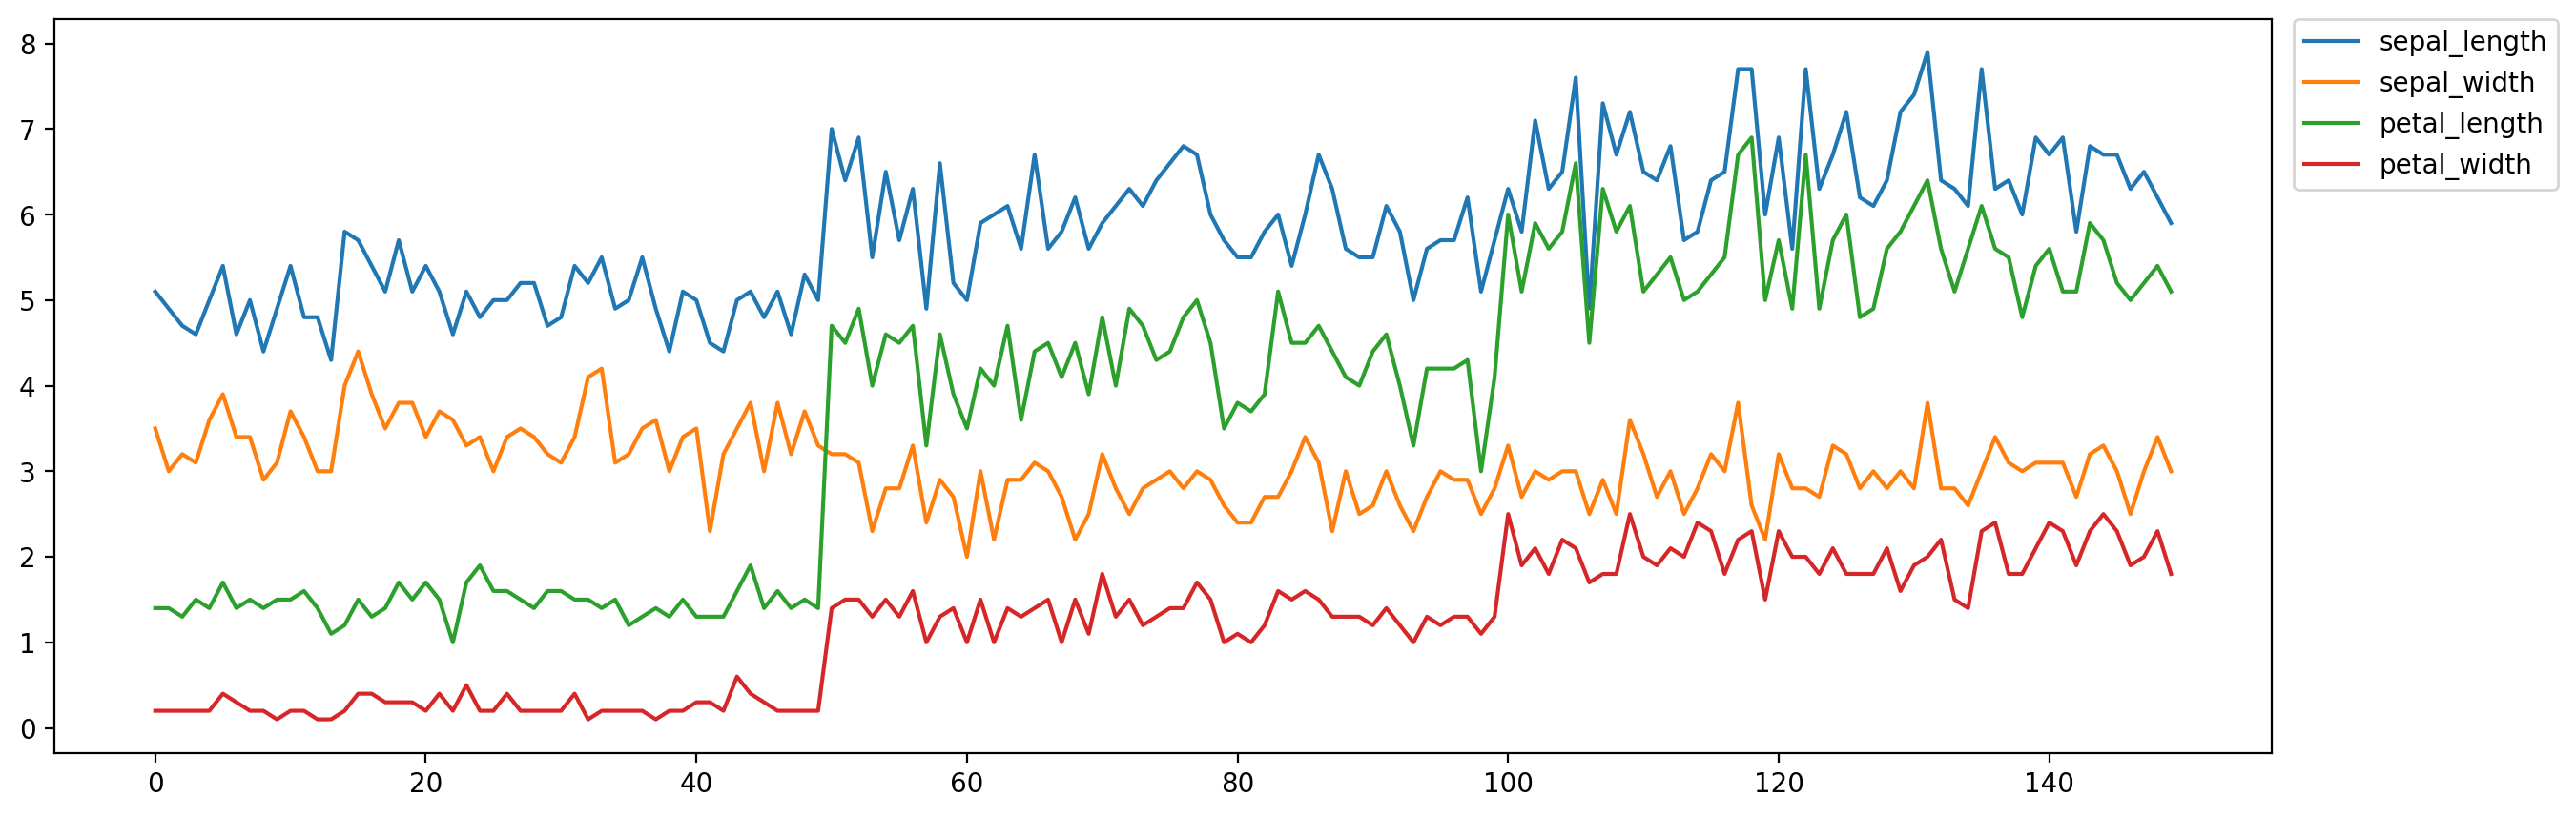

In [59]:
g = iris.plot(kind='line',figsize=(15,5))
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#sns.move_legend(g, 'upper left', bbox_to_anchor=(1,1))
#plt.savefig('data/ch12_iris.jpg')
plt.show()

In [60]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


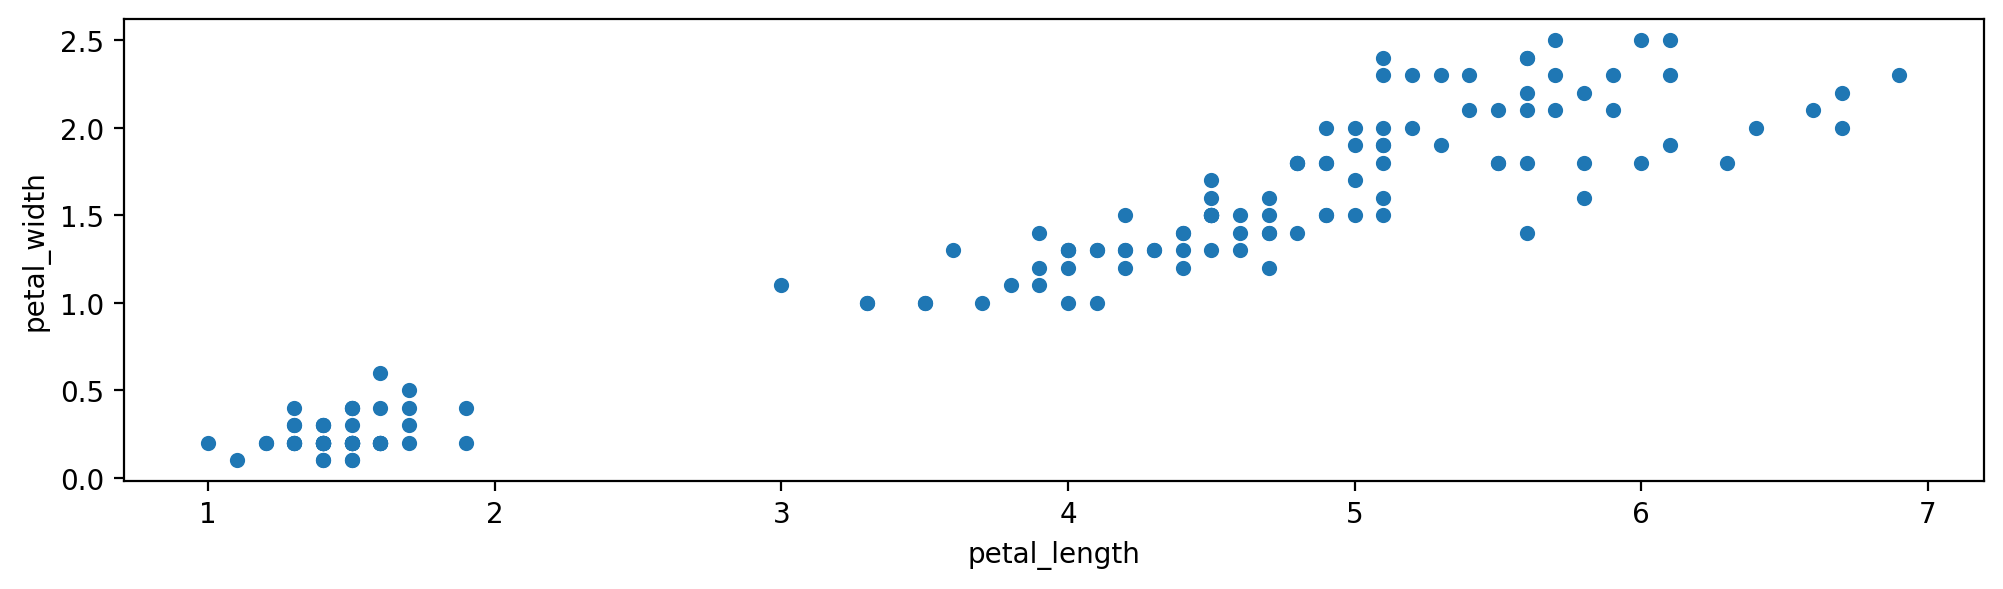

In [62]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

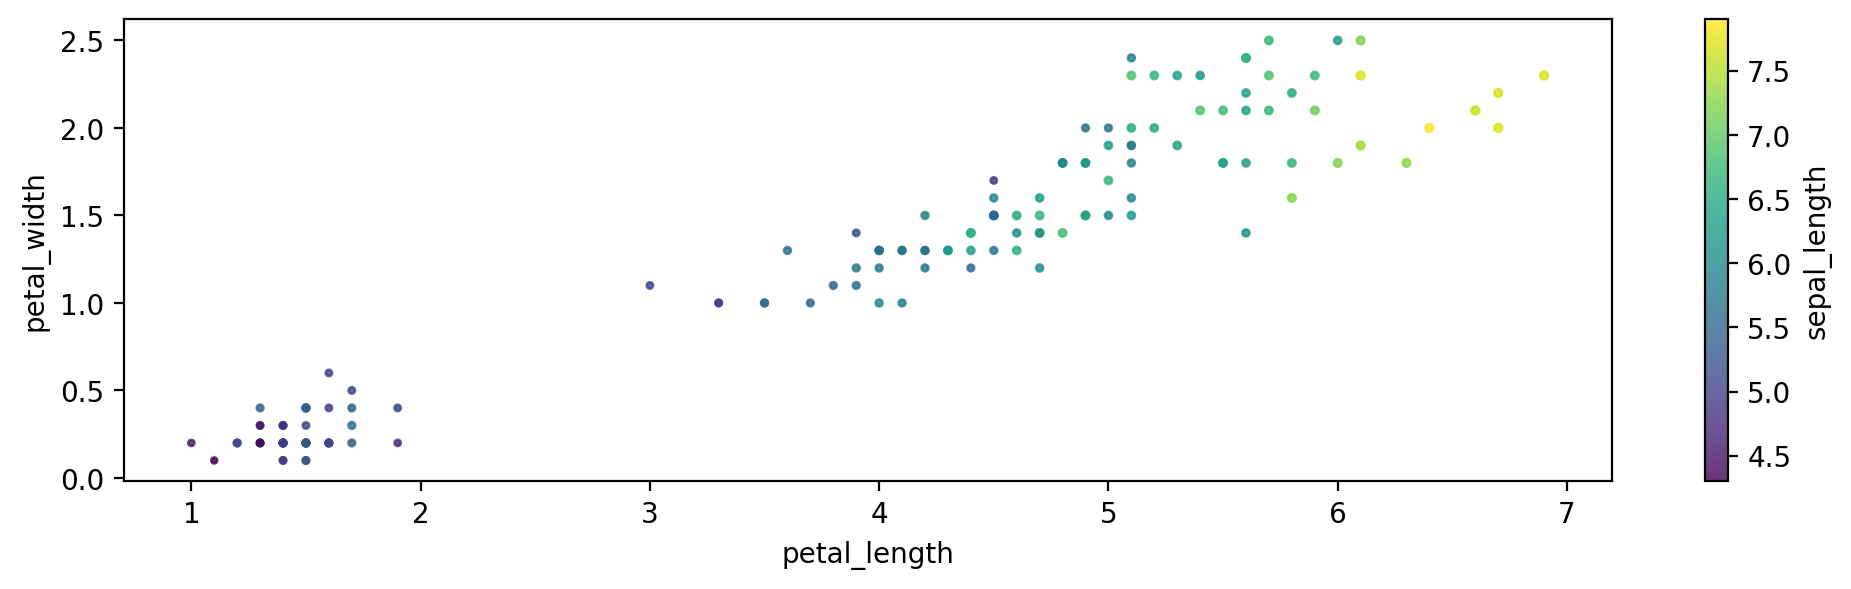

In [65]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='sepal_length',#size
         c='sepal_length',#color
         alpha=.8) #0<=투명도<=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

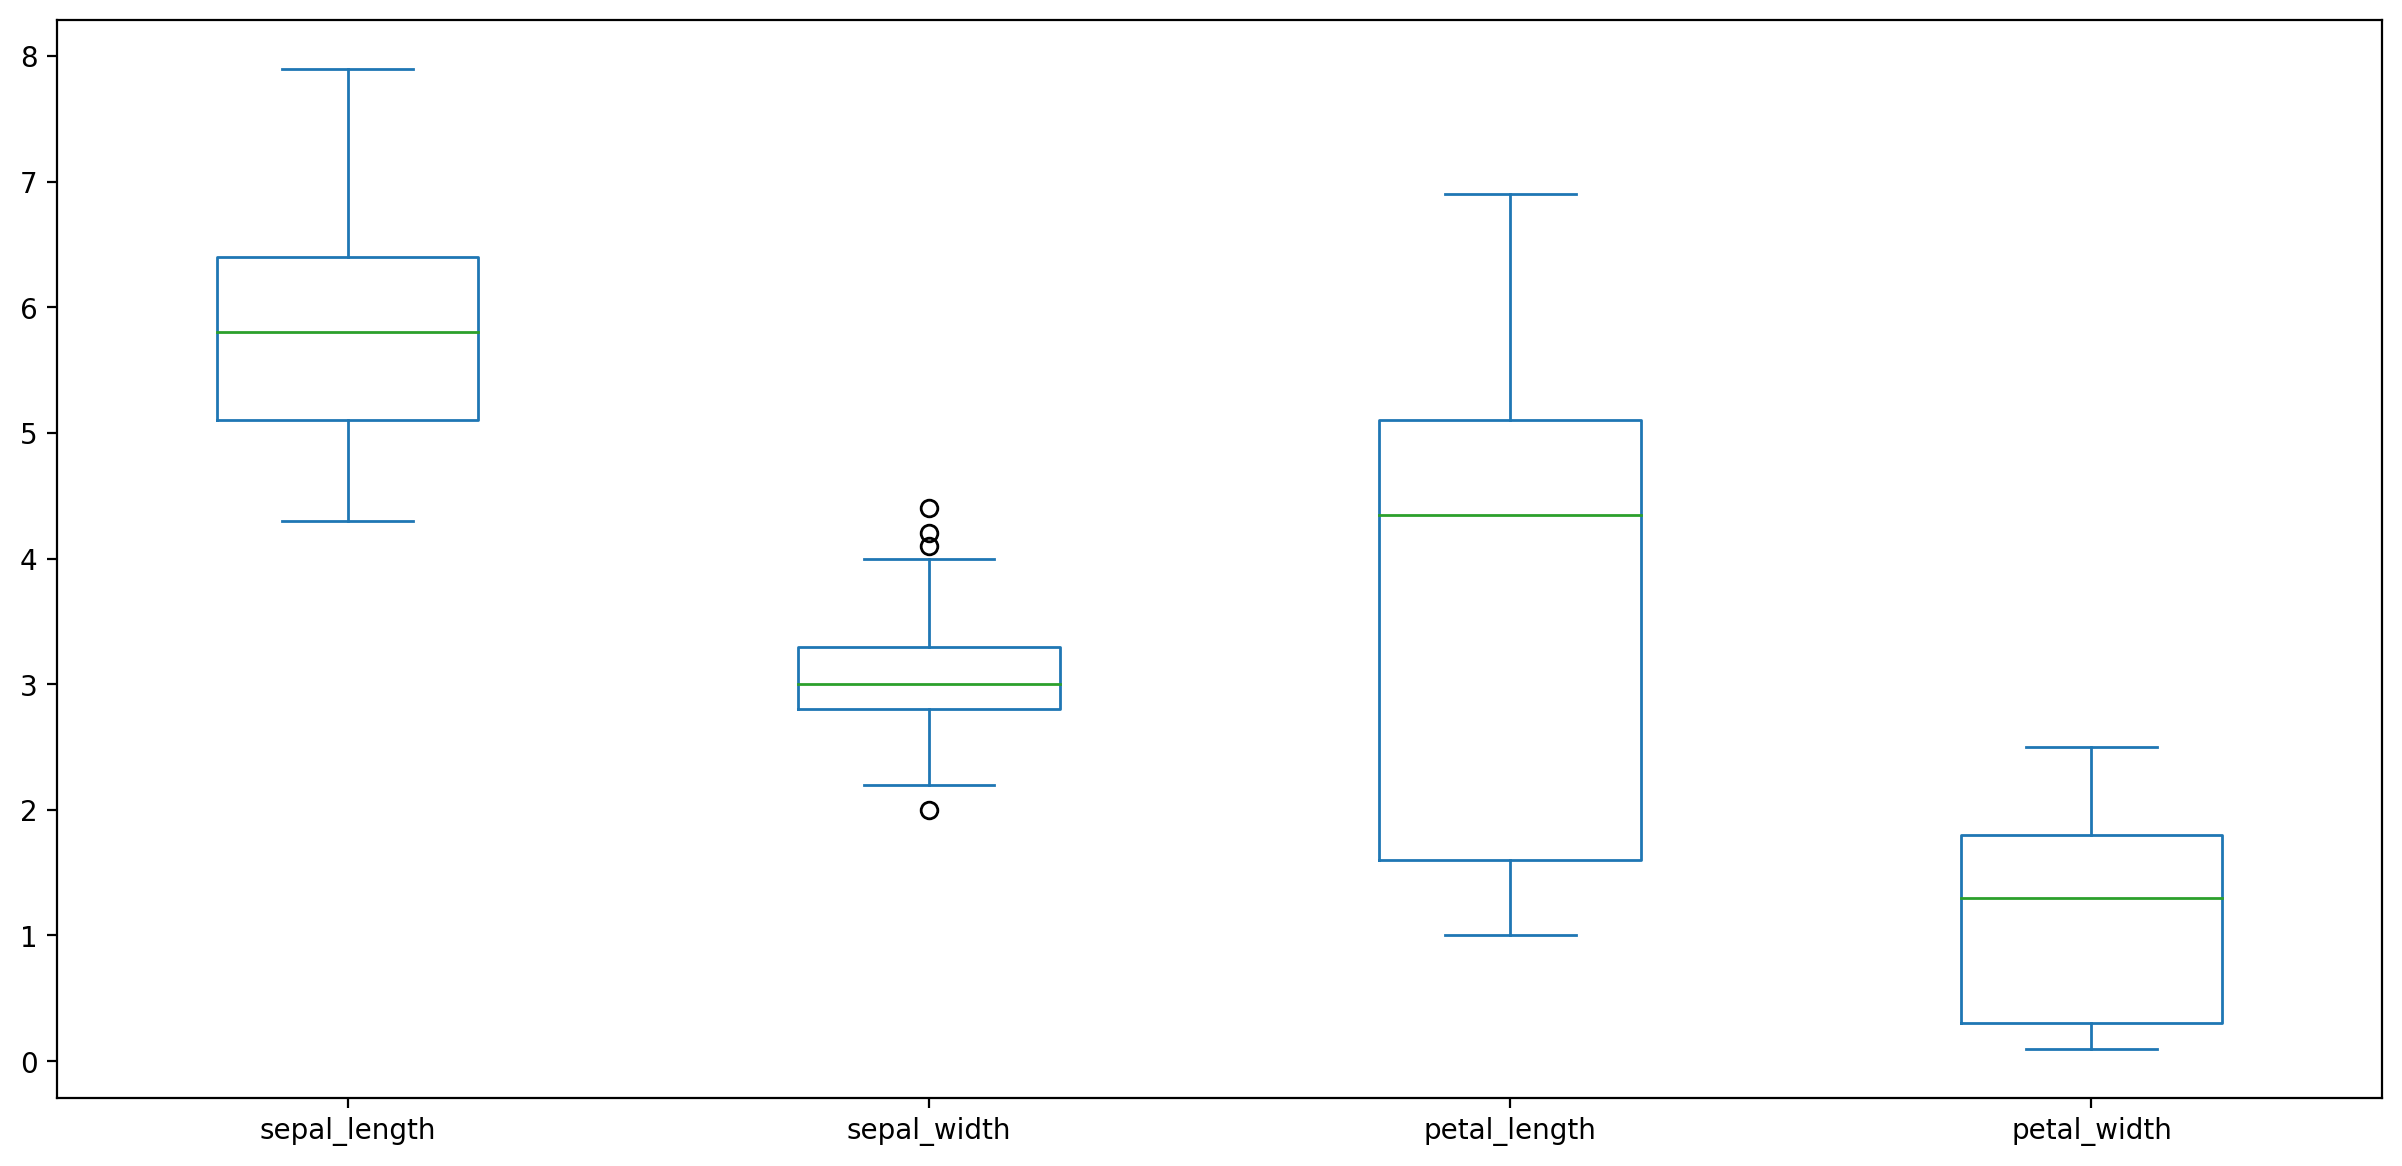

In [67]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(15,7))
plt.show

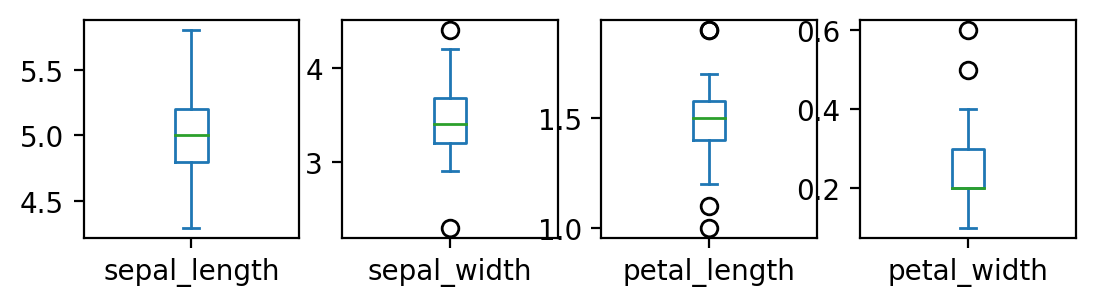

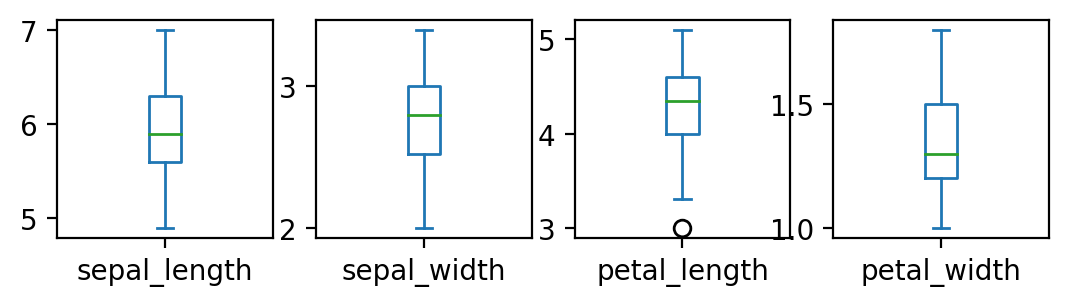

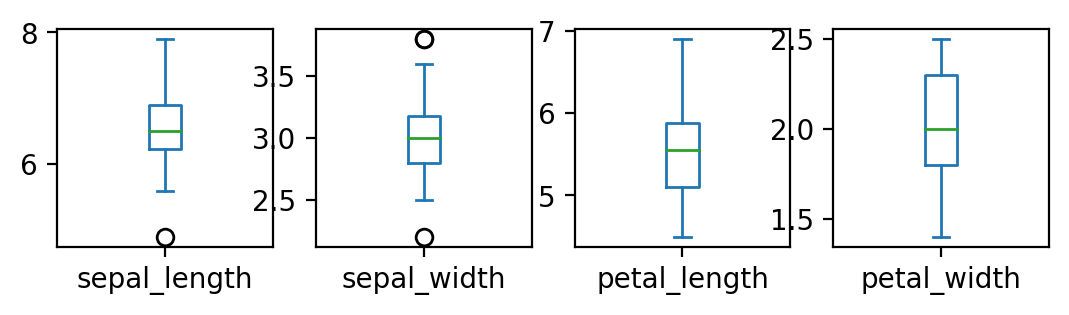

In [72]:
#종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharex=True) #x축공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot함수들: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 1)plt.scatter():산점도

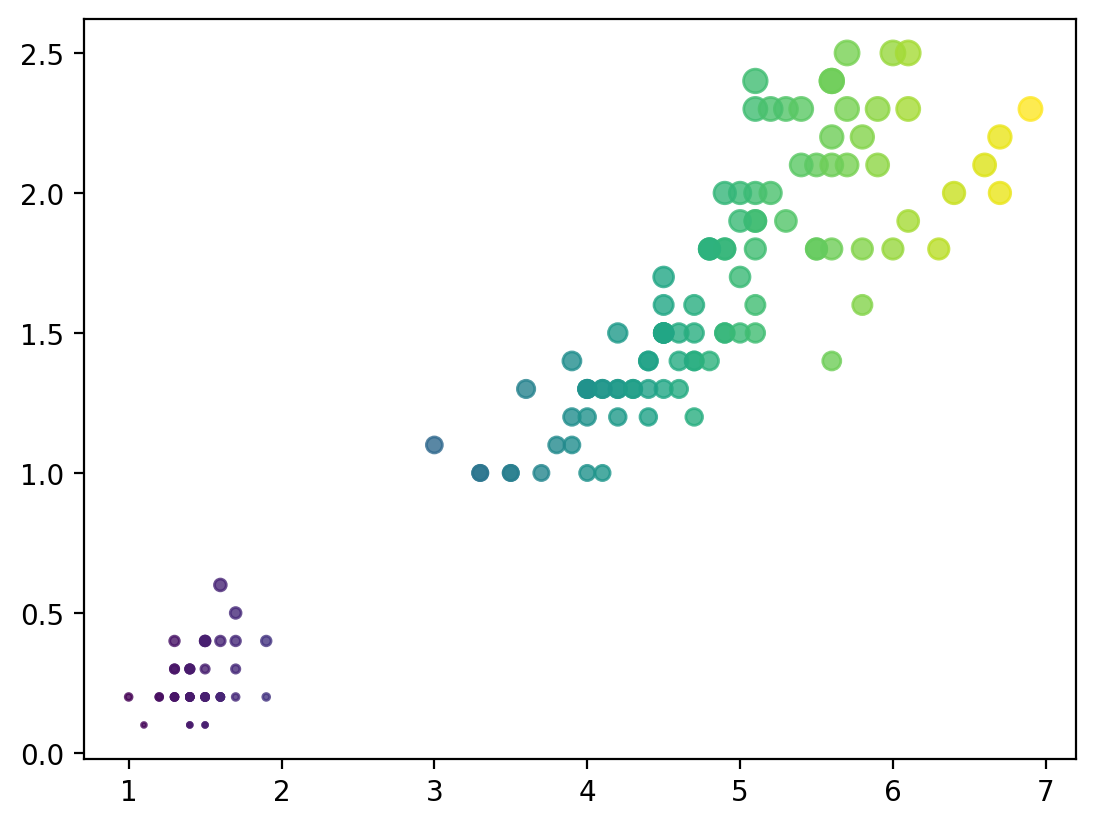

In [79]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30, #size
           c=iris.petal_length*20,#color
           alpha=.8)

### 2)boxplot(단점: 분포를 모름), violinplot()

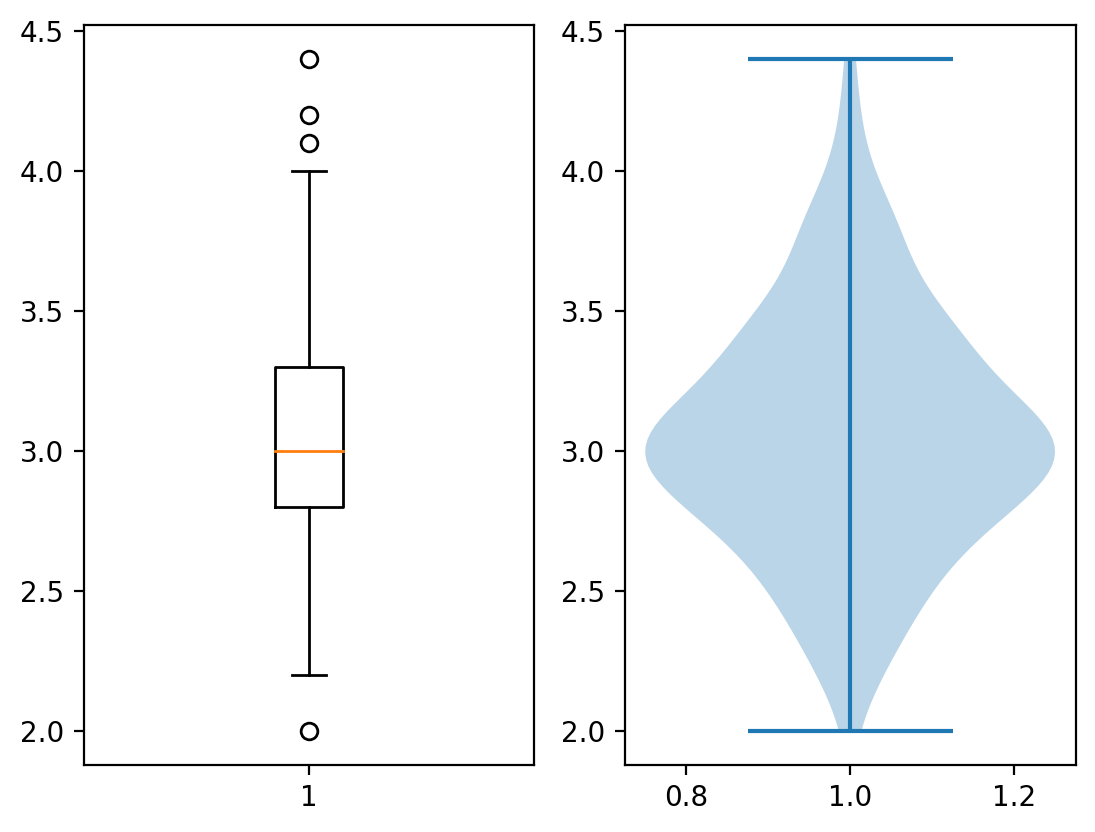

In [81]:
fig, axes= plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3)bar(), barh(), axvline(수직선),axhline(수평선)

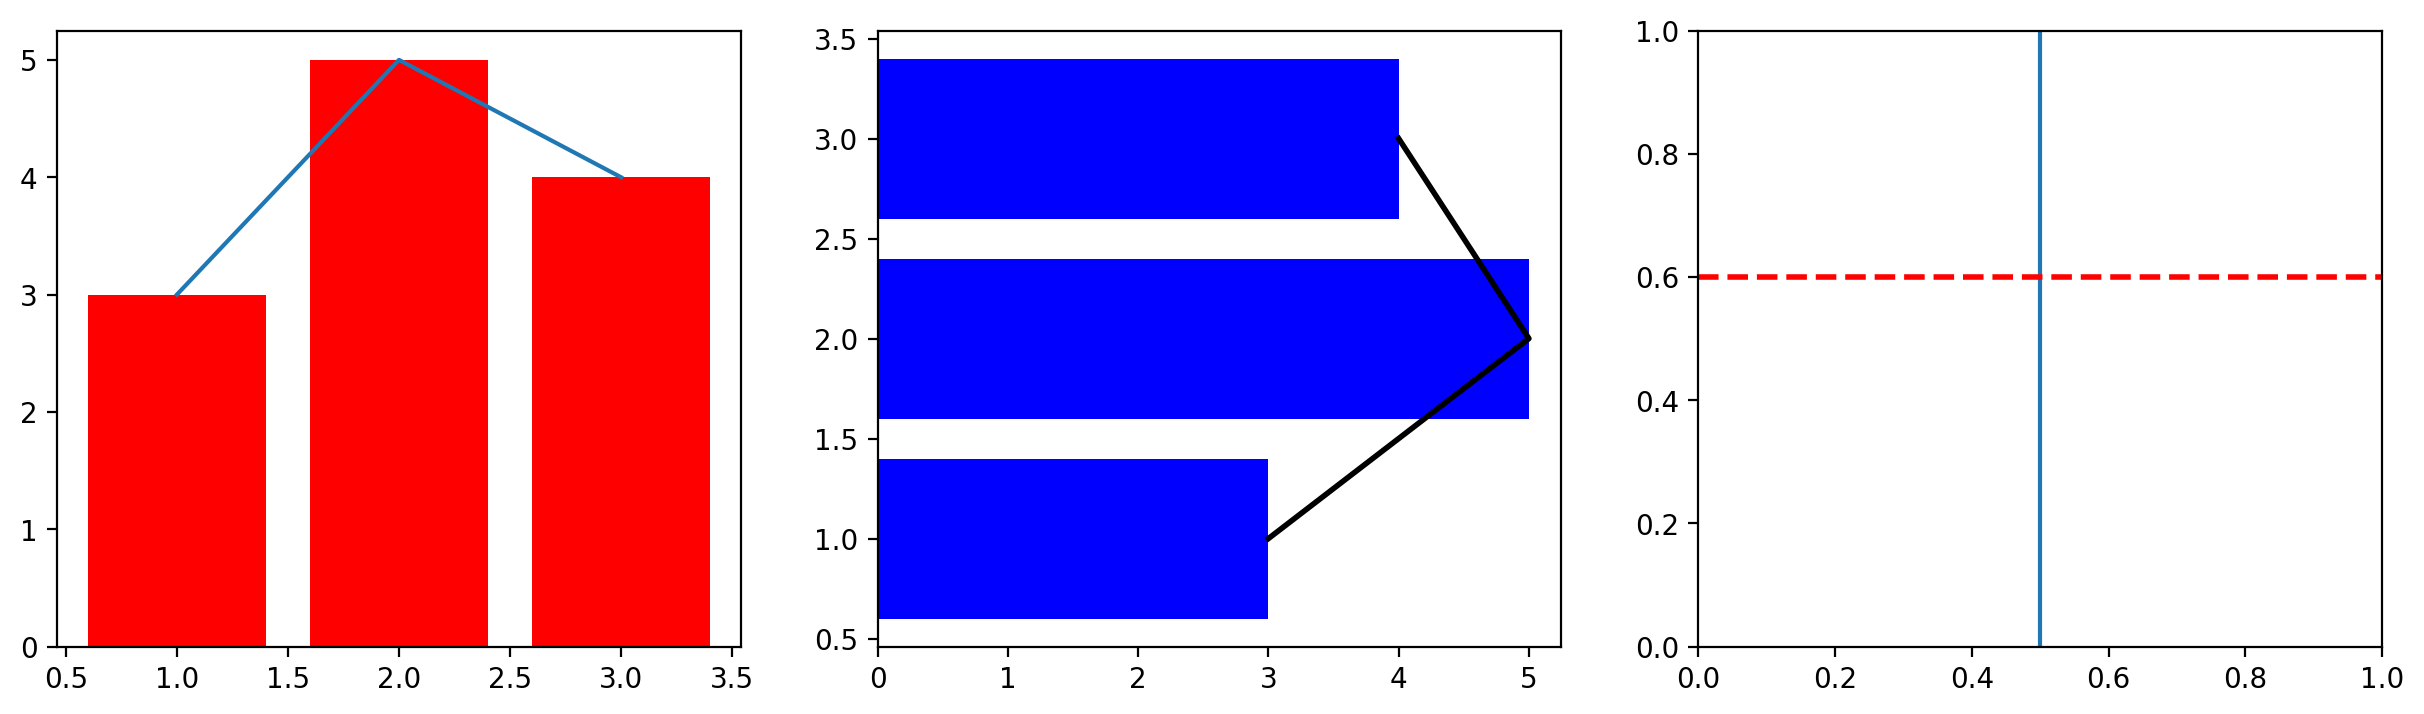

In [93]:
x=[1,2,3]
y=[3,5,4]
fig, axes= plt.subplots(ncols=3, figsize=(15,4))
axes[0].bar(x,y,color='r')
axes[0].plot(x,y)
axes[1].barh(x,y,color='b')
axes[1].plot(y,x,'k', linewidth=2) #k:black
axes[2].axvline(0.5)
axes[2].axhline(0.6,c='r', linewidth=2, linestyle='--')

### 4)hist(도수분포표;histogram)

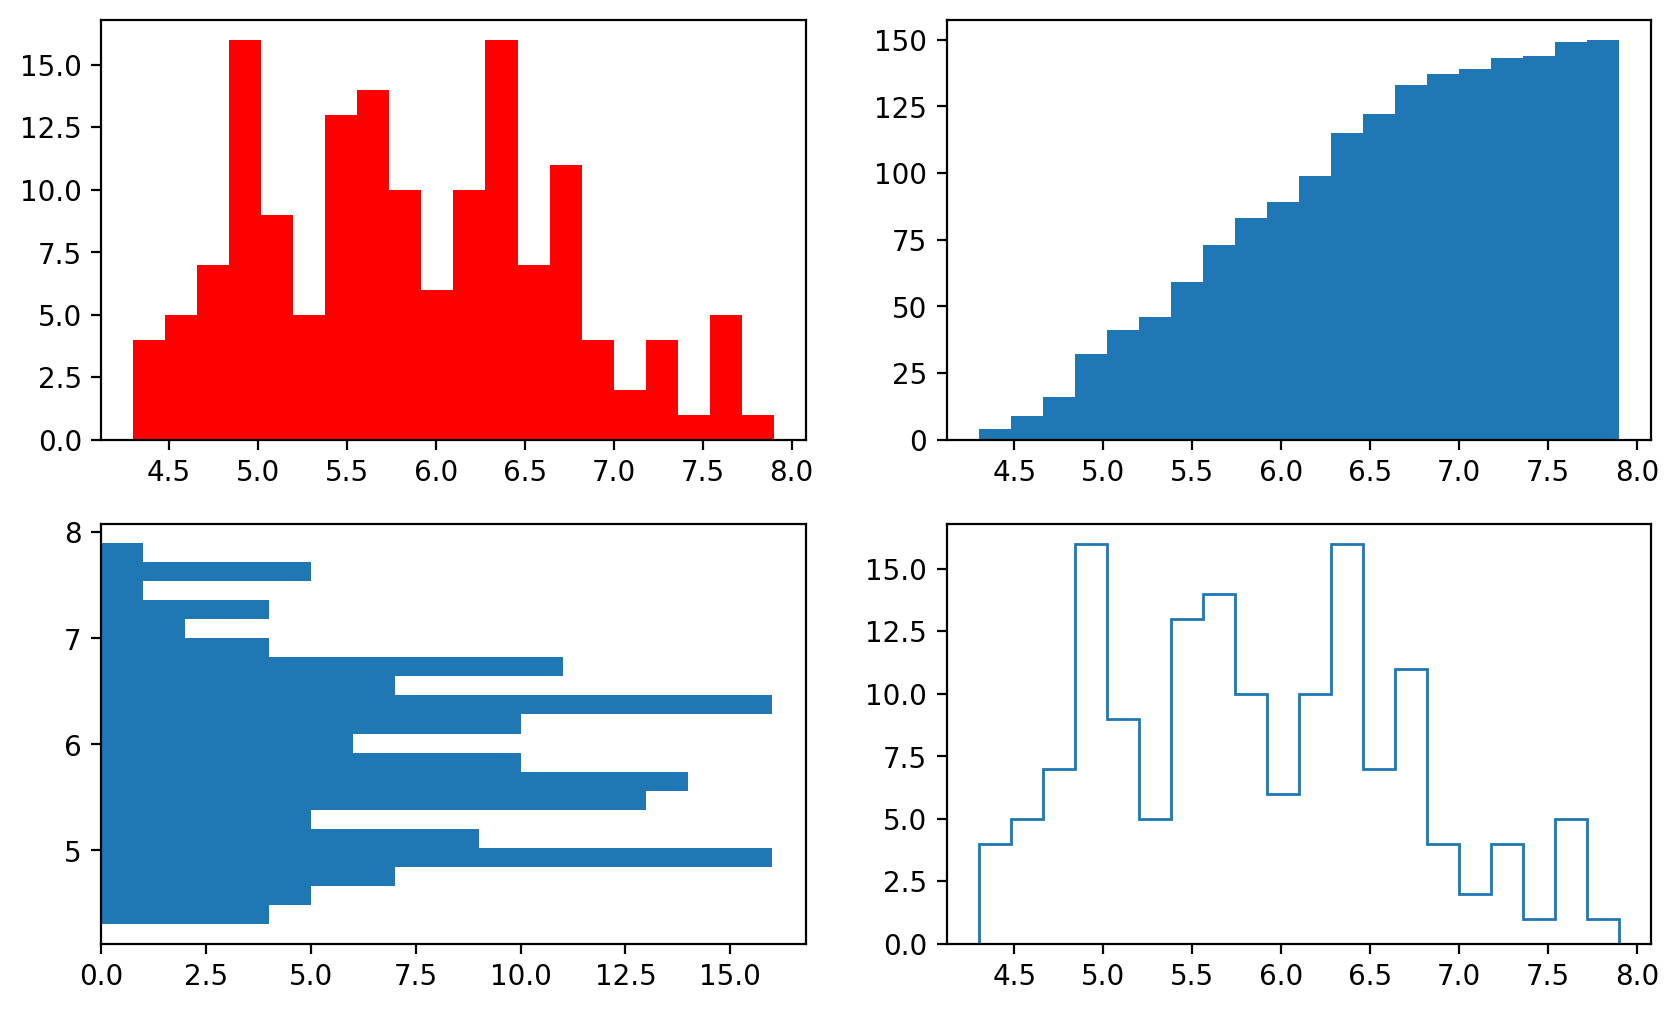

In [101]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') #히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) #누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal')#수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker...(plot의 매개변수로 지정)
### 2) text(), annotate()

In [16]:
#개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties
font_path = 'C:/ai_x/source/01_python/data/nanum-myeongjo-eco/NanumMyeongjoEco.ttf' #폰트ttf파일(네이버폰트, 구글폰트 등에서 다운로드하거나 pc의 폰트파일)
font_prop = FontProperties(fname=font_path, size=25)

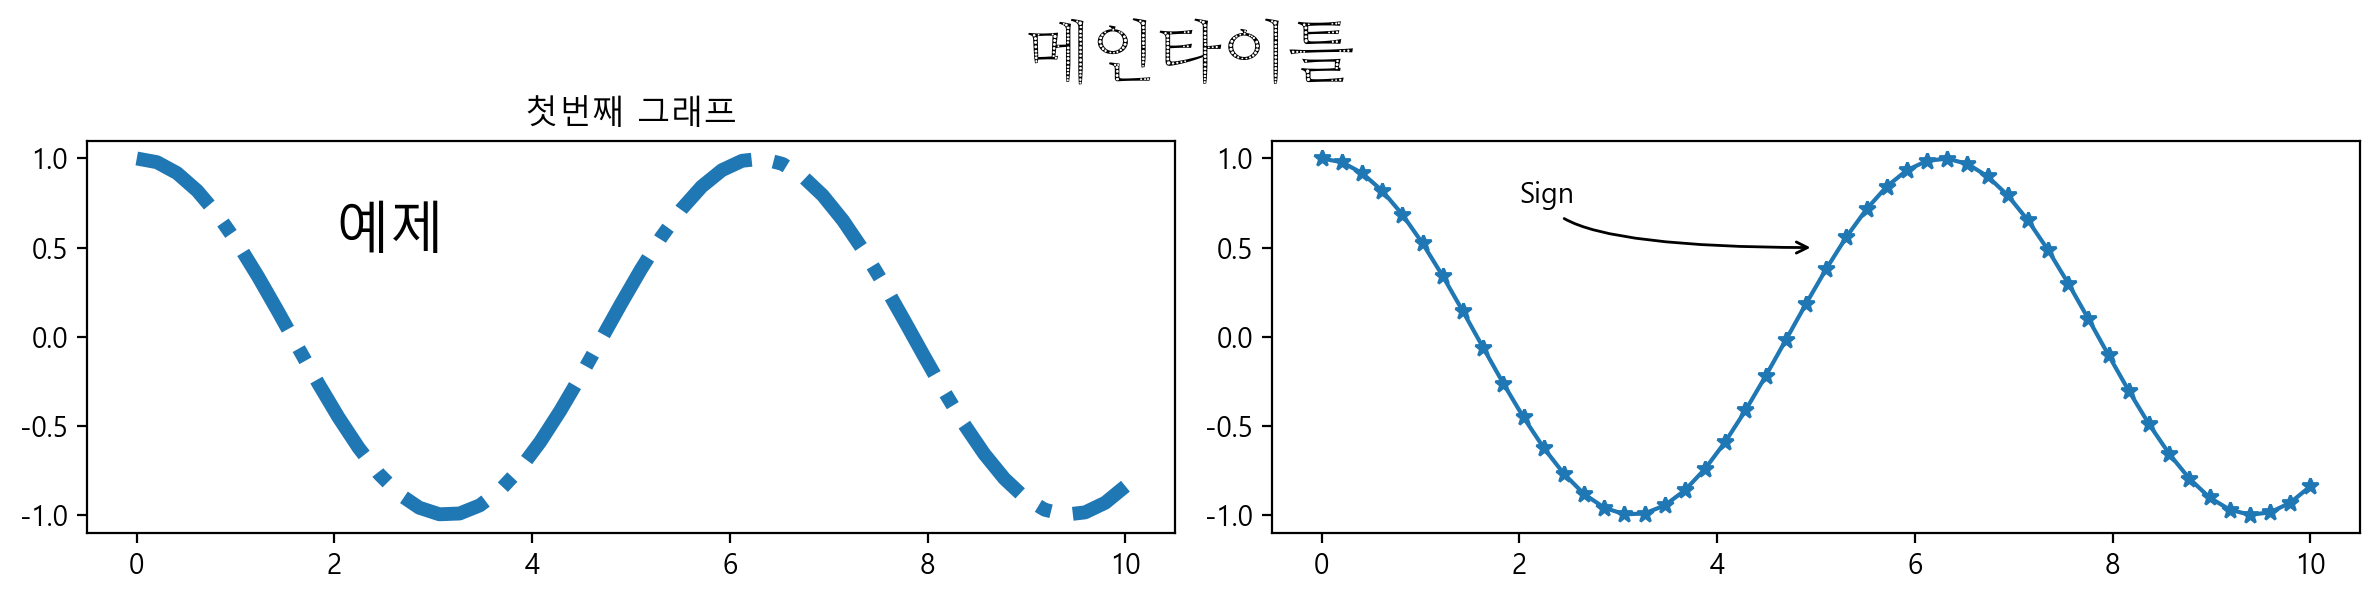

In [23]:
import numpy as np
x = np.linspace(0, 10, 50) #num=50
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x,y, linewidth=5, linestyle='-.')
axes[0].text(2,0.5,'예제', fontsize=20)
axes[0].set_title('첫번째 그래프')
axes[1].plot(x,y, marker='*')
axes[1].annotate('Sign', xytext=(2,0.75), #글자가 있을 좌표 위치(좌하)
             xy=(5, 0.5),
             arrowprops=dict(arrowstyle='->',
                            connectionstyle='angle3') #angle(꺾은선), arc(직선)...
            )
plt.tight_layout(rect=[0,0,1,0.9]) #left, bottom, right, top : 경계의 상대적 비율
plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
- https://matplotlib.org/users/mathtext.html (교안30page)

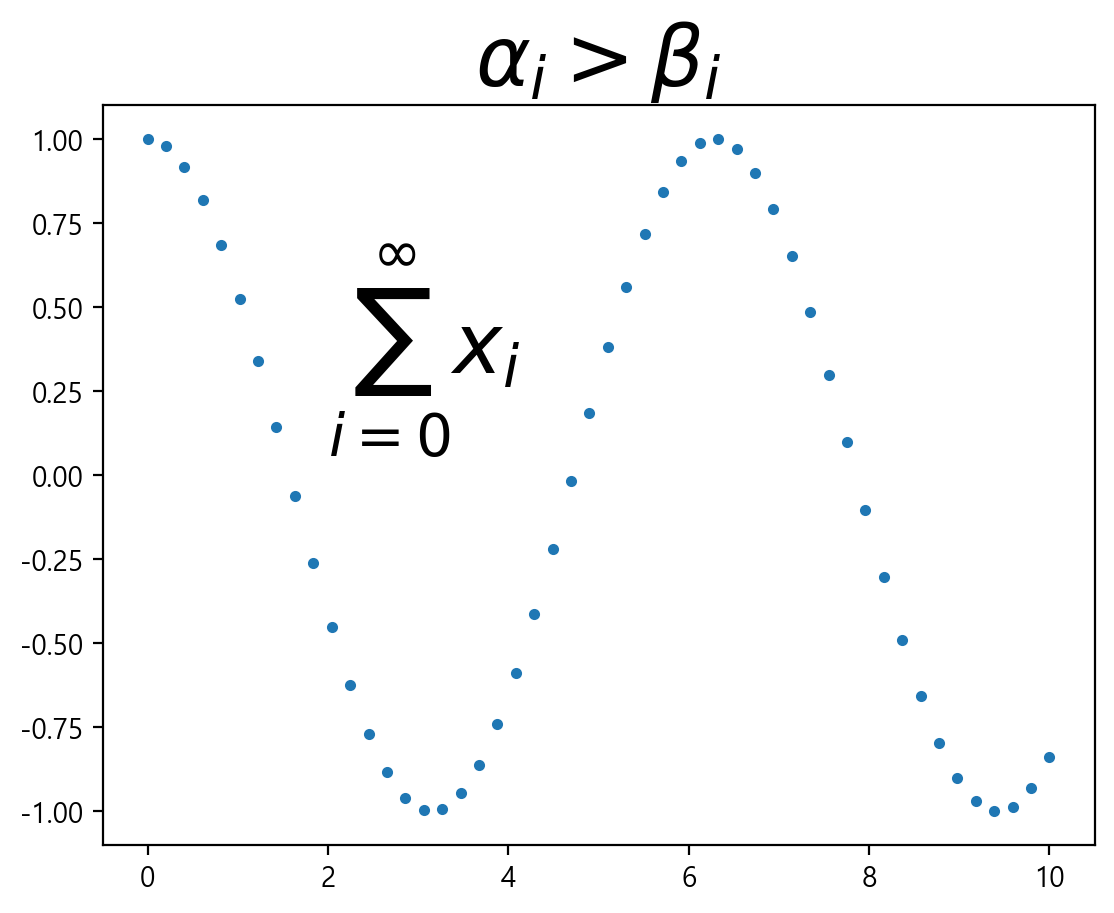

In [35]:
plt.scatter(x,y,marker='.')
plt.title(r'$\alpha_i > \beta_i$', fontsize=30)
plt.text(2, 0.3,  r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.show()

### 4) 축과 눈금
- https://matplotlib.org/3.1.0/api/axis_api.html (교안33page)

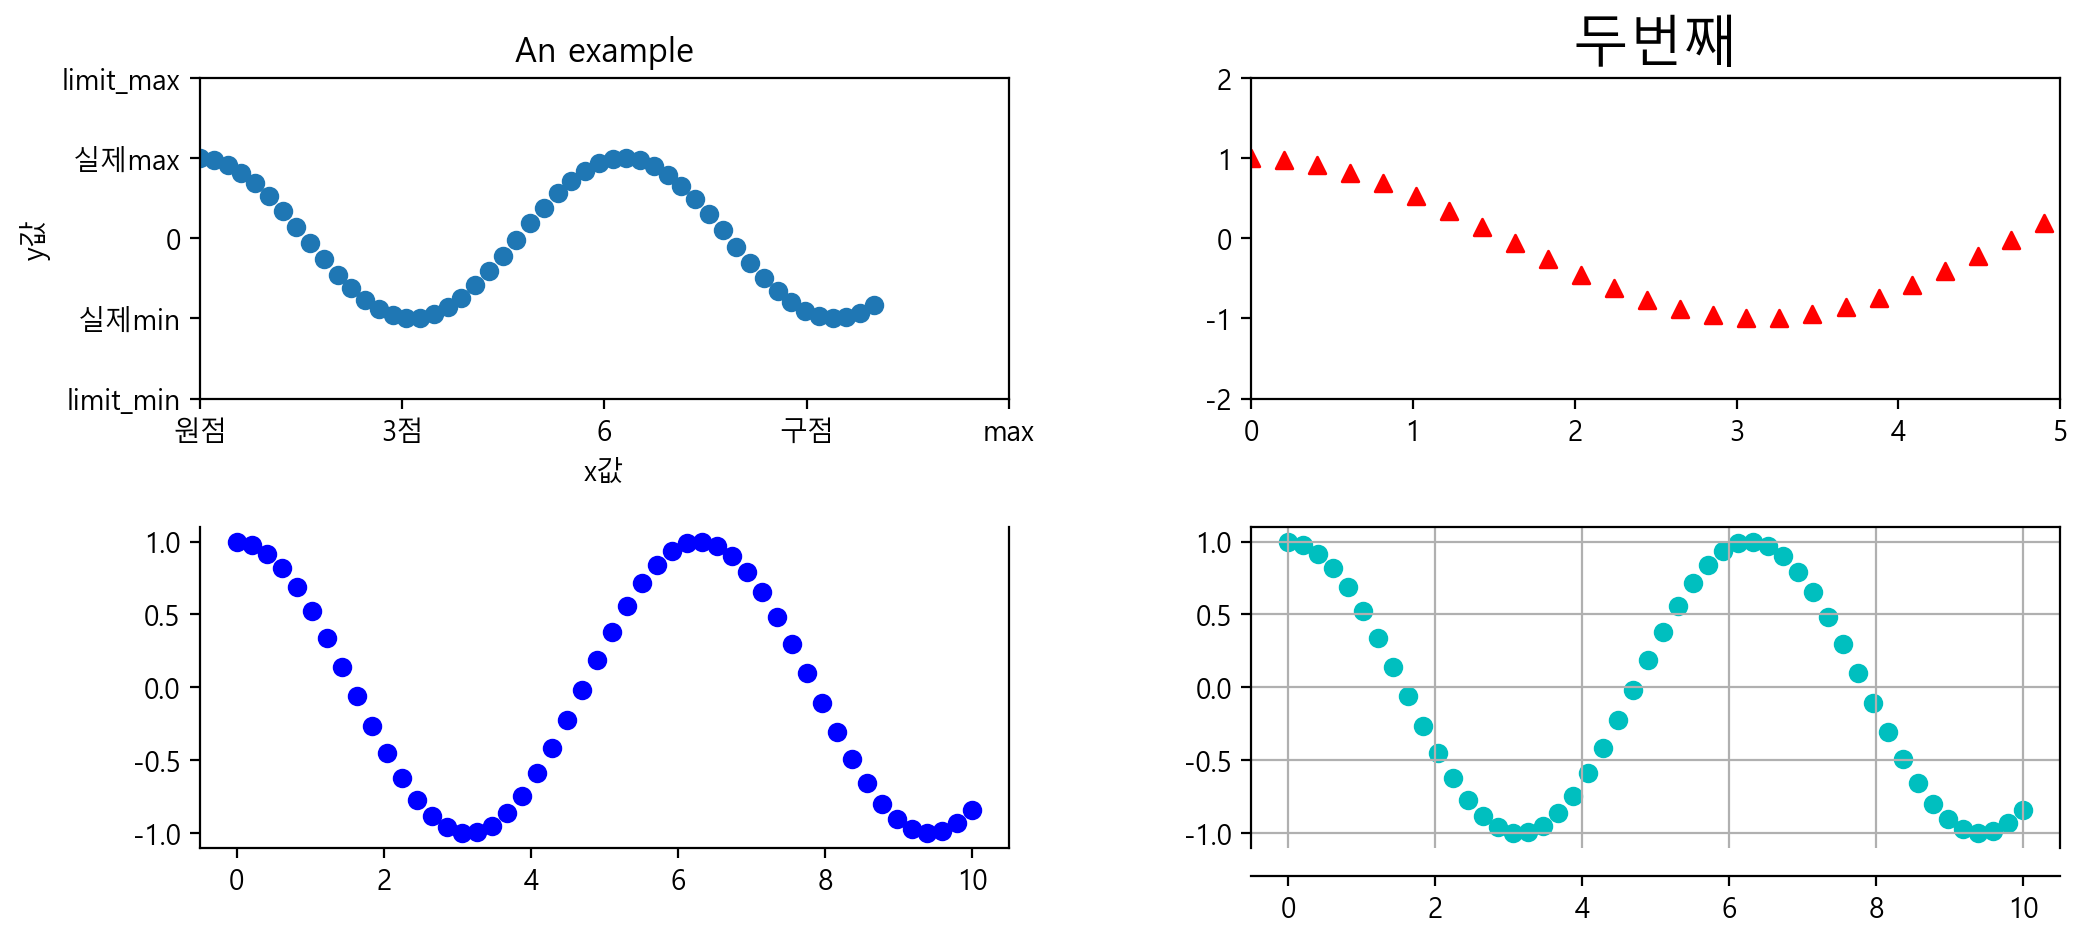

In [54]:
x = np.linspace(0,10) #0~10까지 50개 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
plt.subplots_adjust(hspace=0.4, wspace=0.3) #서브플롯끼리 여백 조정(hspace 위아래 여백, wspace좌우 여백)
axes[0,0].scatter(x,y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x값',
             xlim=[0,12], #x축 눈금의 범위
             ylim=[-2,2], #y축 눈금의 범위
             xticks=[0, 3, 6, 9, 12], #x축 눈금
             xticklabels = ['원점', '3점', 6, '구점', 'max'], #x축 눈금 라벨
             yticks=[-2,-1,0,1,2], #y축 눈금
             yticklabels = ['limit_min', '실제min', 0, '실제max', 'limit_max']
             )
axes[0,1].scatter(x,y,c='r', marker='^')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim(0,5) #set(xlim=[0,5])
axes[0,1].set_ylim(-2,2)
axes[1,0].scatter(x,y,c='b')
axes[1,0].spines['top'].set_visible(False)
axes[1,1].scatter(x,y,c='c')
axes[1,1].spines['bottom'].set_position(('outward', 10))
axes[1,1].grid(True)
plt.show()

In [55]:
x=np.arange(0,10)
y1 = 0.5*x**2
y2 = -y1

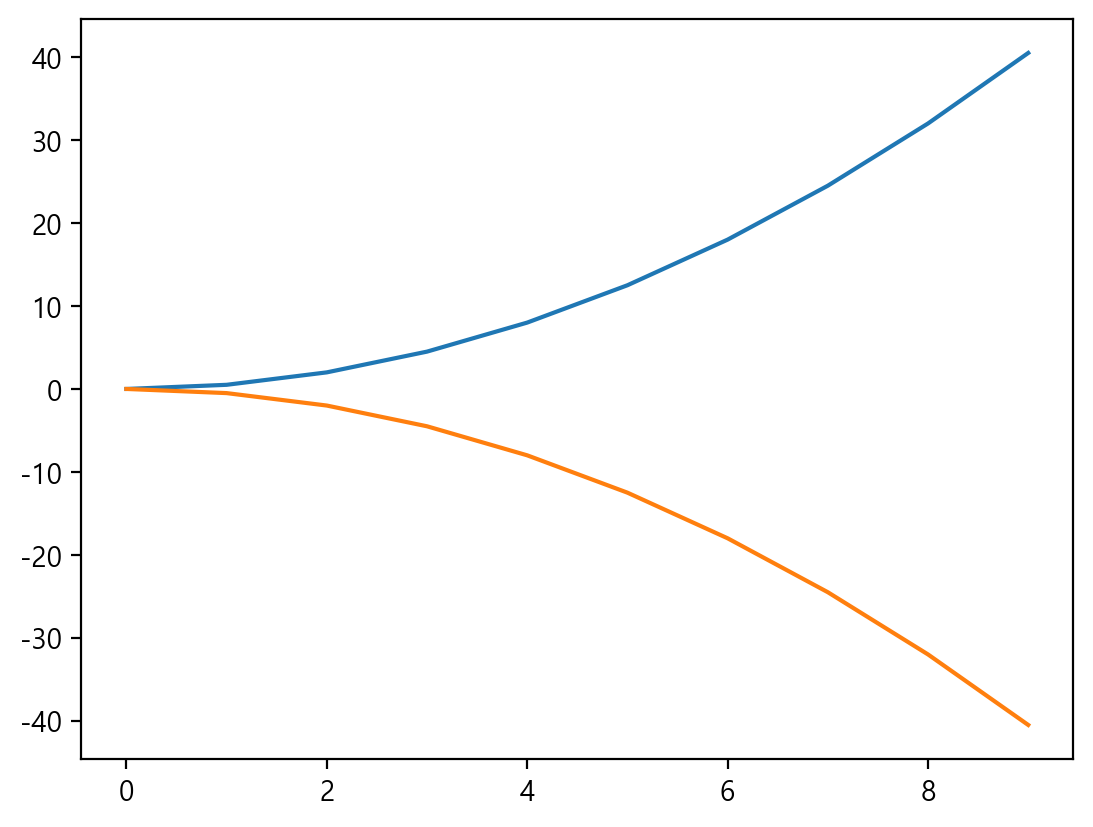

In [56]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

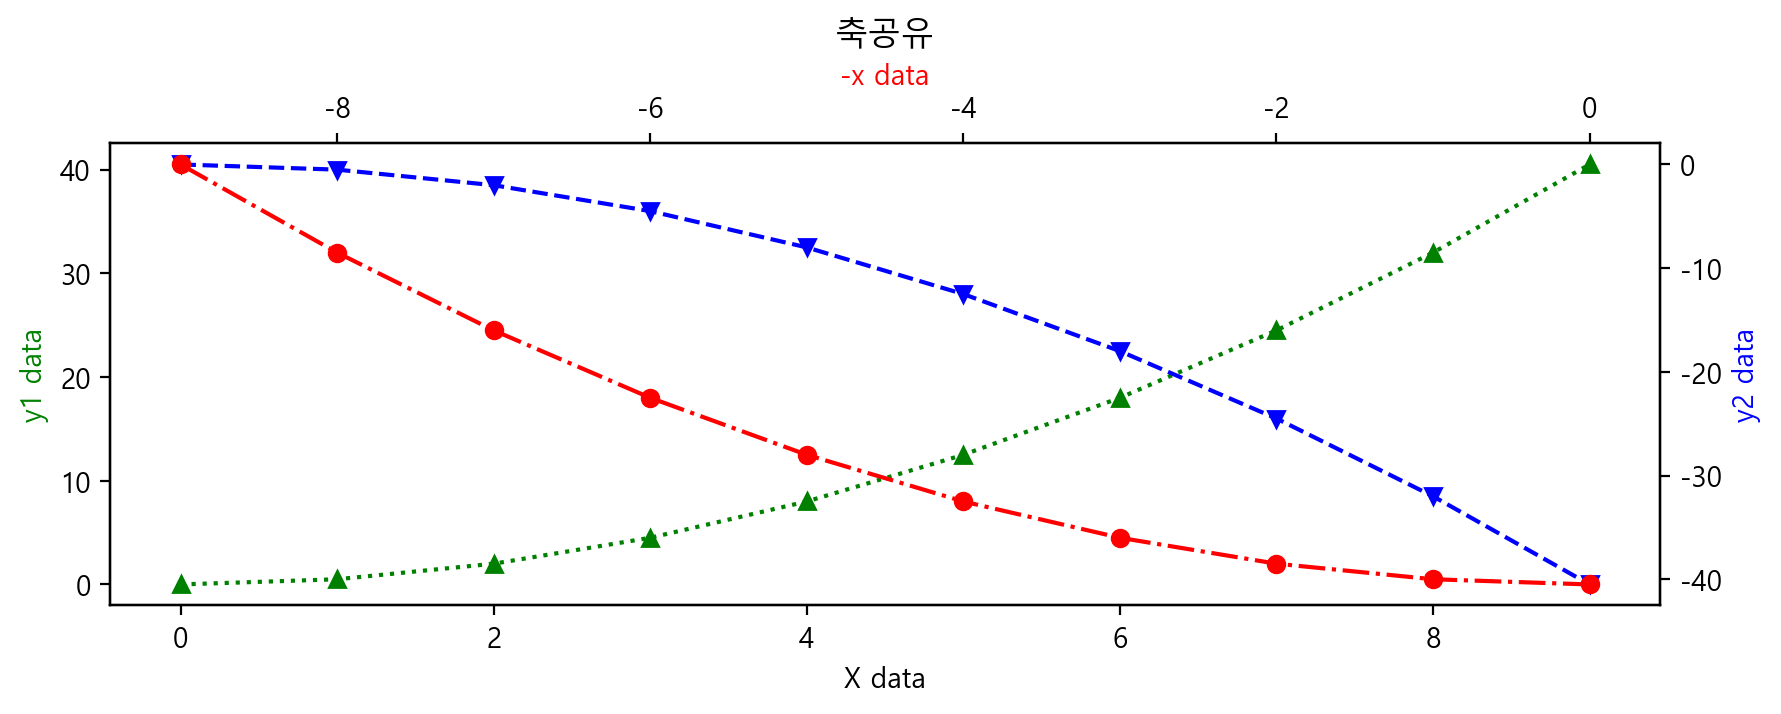

In [68]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x,y1,'g^:')
ax1.set(title='축공유', xlabel='X data')
ax1.set_ylabel('y1 data', color='g')

ax2 = ax1.twinx() #ax1과 x축을 공유하는 ax2생성
ax2.plot(x,y2, 'bv--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() #ax1과 y축을 공유하는 ax3생성
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례표시
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

### 7) 플롯 스타일 지정

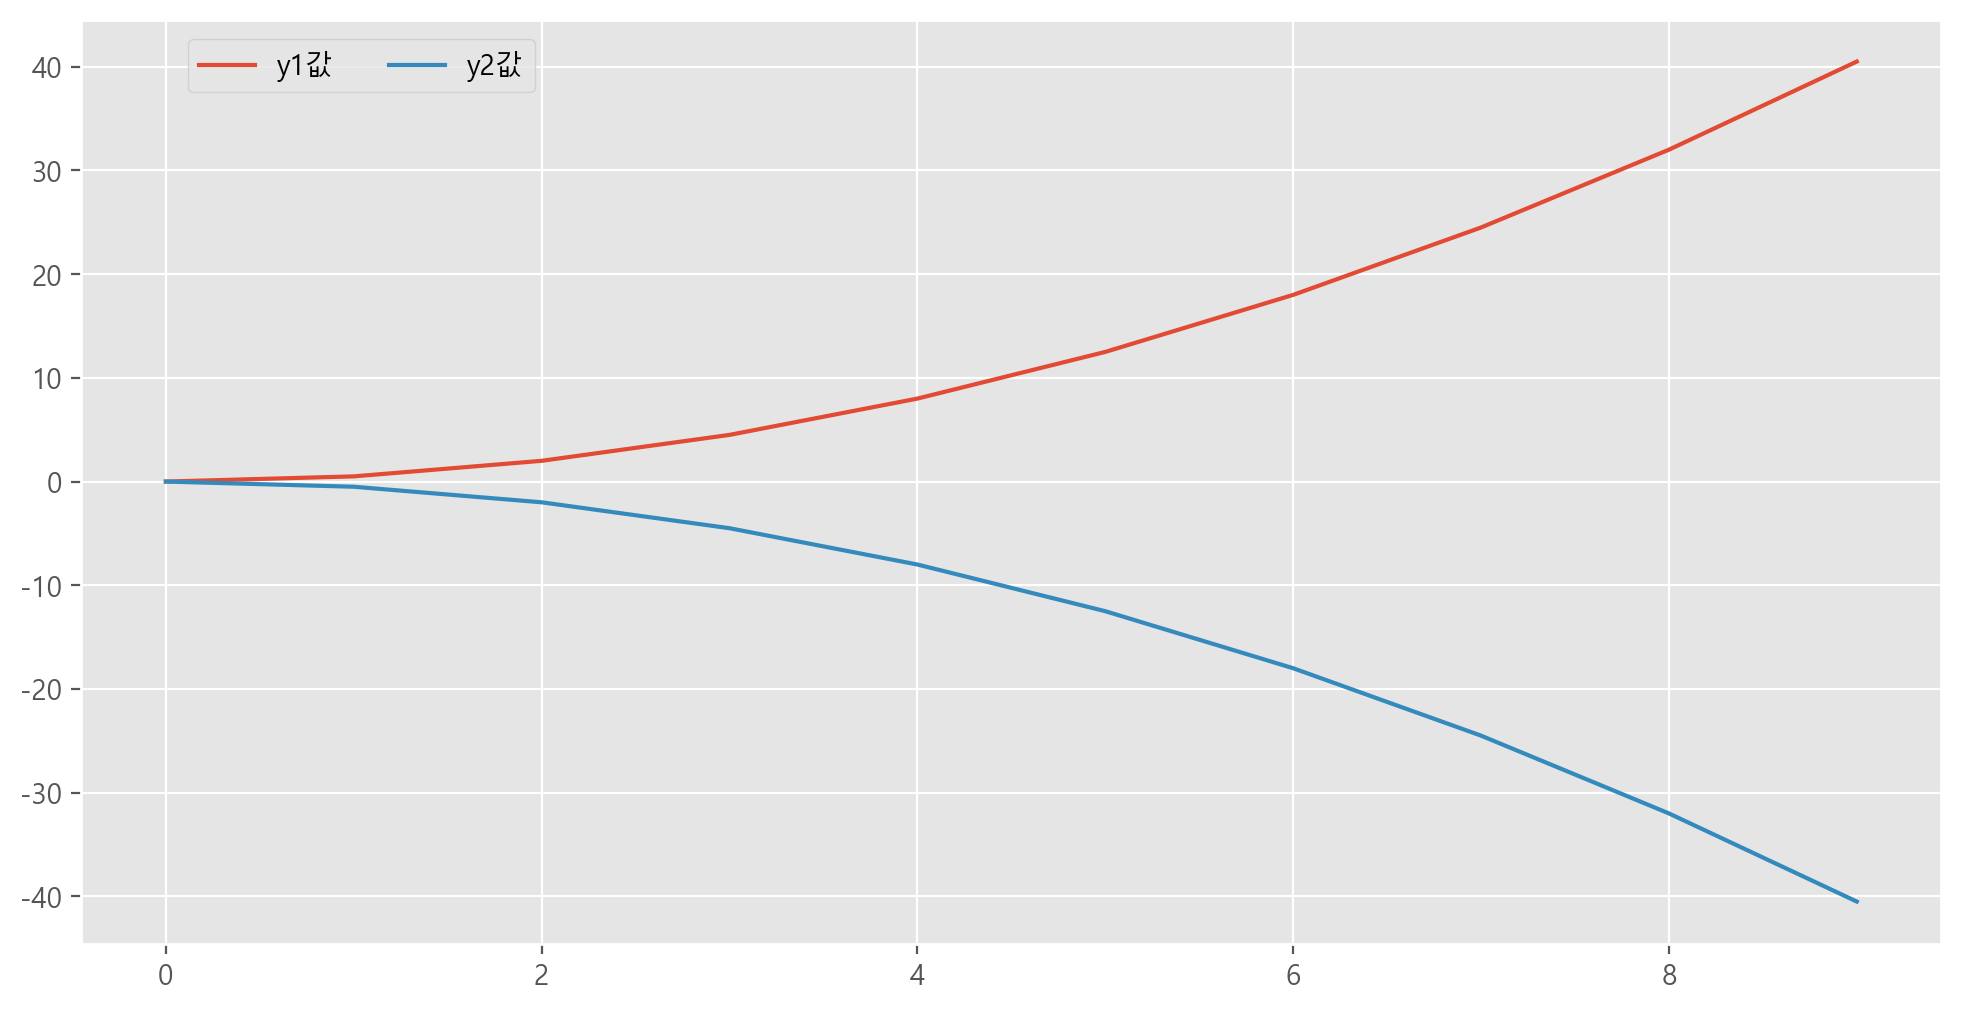

In [80]:
plt.style.use('ggplot') #스타일 지정하는 함수를 쓰면 모든 설정 초기화
plt.figure(figsize=(12,6))
plt.plot(x,y1, label='y1값')
plt.plot(x,y2, label='y2값')
plt.legend(loc='center left', ncol=2, bbox_to_anchor=(0.05,0.95))
plt.show()